<a href="https://colab.research.google.com/github/abhay43/ML_Code/blob/master/CNN_on_fer2013.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [3]:
from zipfile import ZipFile

In [4]:
file_name = '/content/drive/My Drive/Faltu/28577_36420_compressed_fer2013.csv.zip'
with ZipFile(file_name, 'r') as zip: 
    # printing all the contents of the zip file 
    zip.printdir() 
  
    # extracting all the files 
    print('Extracting all the files now...') 
    zip.extractall() 
    print('Done!') 

File Name                                             Modified             Size
fer2013.csv                                    2019-10-01 04:15:22    301072766
Extracting all the files now...
Done!


In [5]:
import pandas as pd
import numpy as np

data = pd.read_csv('/content/fer2013.csv')
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [6]:
import os
import cv2

In [44]:
def save_fer_img():
  for index,row in data.iterrows():
    pixels=np.asarray(list(row['pixels'].split(' ')),dtype=np.uint8)
    img=pixels.reshape((48,48))
    if(row['emotion'] == 6 and row['Usage'] != 'Training'):
      pathname=os.path.join('/content/test/Neutral/',str(index)+'.jpg')
      cv2.imwrite(pathname,img)

In [45]:
save_fer_img()

In [ ]:
#def save_fer_img():
  for index,row in data.iterrows():
    pixels=np.asarray(list(row['pixels'].split(' ')),dtype=np.uint8)
    img=pixels.reshape((48,48))
    if(row['emotion'] == 0 and row['Usage'] == 'Training'):
      pathname=os.path.join('/content/training/Angry/',str(index)+'.jpg')
      cv2.imwrite(pathname,img)
    elf(row['emotion'] == 1 and row['Usage'] == 'Training'):
      pathname=os.path.join('/content/training/Disgust/',str(index)+'.jpg')
      cv2.imwrite(pathname,img)
    elif(row['emotion'] == 2 and row['Usage'] == 'Training'):
      pathname=os.path.join('/content/training/Fear/',str(index)+'.jpg')
      cv2.imwrite(pathname,img)
    elif(row['emotion'] == 3 and row['Usage'] == 'Training'):
      pathname=os.path.join('/content/training/Happy/',str(index)+'.jpg')
      cv2.imwrite(pathname,img)
    elif(row['emotion'] == 4 and row['Usage'] == 'Training'):
      pathname=os.path.join('/content/training/Sad/',str(index)+'.jpg')
      cv2.imwrite(pathname,img)
    elif(row['emotion'] == 5 and row['Usage'] == 'Training'):
      pathname=os.path.join('/content/training/Surprise/',str(index)+'.jpg')
      cv2.imwrite(pathname,img)
    elif(row['emotion'] == 5 and row['Usage'] == 'Training'):
      pathname=os.path.join('/content/training/Neutral/',str(index)+'.jpg')
      cv2.imwrite(pathname,img)

    elif(row['emotion'] == 0 and row['Usage'] != 'Training'):
      pathname=os.path.join('/content/test/Angry/',str(index)+'.jpg')
      cv2.imwrite(pathname,img)
    elif(row['emotion'] == 1 and row['Usage'] != 'Training'):
      pathname=os.path.join('/content/test/Disgust/',str(index)+'.jpg')
      cv2.imwrite(pathname,img)
    elif(row['emotion'] == 2 and row['Usage'] != 'Training'):
      pathname=os.path.join('/content/test/Fear/',str(index)+'.jpg')
      cv2.imwrite(pathname,img)
    elif(row['emotion'] == 3 and row['Usage'] != 'Training'):
      pathname=os.path.join('/content/test/Happy/',str(index)+'.jpg')
      cv2.imwrite(pathname,img)
    elif(row['emotion'] == 4 and row['Usage'] != 'Training'):
      pathname=os.path.join('/content/test/Sad/',str(index)+'.jpg')
      cv2.imwrite(pathname,img)
    elif(row['emotion'] == 5 and row['Usage'] != 'Training'):
      pathname=os.path.join('/content/test/Surprise/',str(index)+'.jpg')
      cv2.imwrite(pathname,img)
    elif(row['emotion'] == 6 and row['Usage'] != 'Training'):
      pathname=os.path.join('/content/test/Neutral/',str(index)+'.jpg')
      cv2.imwrite(pathname,img)

In [55]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Activation, Flatten, ReLU, Dropout, MaxPooling2D, Dense
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [74]:
epochs = 100
batchsize = 20
training_samples = 100
test_samples = 100
train_data_dir=r"/content/training"
test_data_dir=r"/content/test"
img_weight, img_height =48, 48 

## We need to set the input_shape for the model as it is used in the CNN
import tensorflow.keras.backend as k
if k.image_data_format()=='channels_first': 
    input_shape=(3, img_weight, img_height)
else:
    input_shape=(img_weight,img_height,3)

In [75]:
#### Data Preprocessing-- 
train_datagen = ImageDataGenerator(zoom_range=0.2,rescale=1./255, horizontal_flip=True, shear_range=0.2 )
test_datagen = ImageDataGenerator(rescale=1./255)
train_data_gen = train_datagen.flow_from_directory(train_data_dir, target_size=(img_weight, img_height), classes=['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral'], batch_size=batchsize, class_mode='categorical')
test_data_gen = train_datagen.flow_from_directory(test_data_dir, target_size=(img_weight, img_height), batch_size=batchsize, class_mode='categorical', classes=['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral'])

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [76]:
model_0 = Sequential()
model_0.add(Conv2D(64,(3,3), activation='relu', input_shape=input_shape))
model_0.add(MaxPooling2D(pool_size=(2,2)))

model_0.add(Conv2D(128,(3,3), activation='relu'))
model_0.add(MaxPooling2D(pool_size=(2,2)))

model_0.add(Conv2D(256, (3,3), activation='relu'))
model_0.add(MaxPooling2D(pool_size=(2,2)))

model_0.add(Conv2D(512, (3,3), activation='relu'))
model_0.add(MaxPooling2D(pool_size=(2,2)))

model_0.add(Flatten())
model_0.add(Dense(128, activation='relu'))
model_0.add(Dense(64, activation='relu'))
model_0.add(Dense(1, activation='sigmoid'))
model_0.summary()



Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 46, 46, 64)        1792      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 2, 2, 512)        

In [77]:
## Compile the model
model_0.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model_0.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 46, 46, 64)        1792      
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 21, 21, 128)       73856     
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 10, 10, 128)       0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 8, 8, 256)         295168    
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 4, 4, 256)         0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 2, 2, 512)        

In [78]:

## Fitting the model

training = model_0.fit_generator(train_data_gen,
                  steps_per_epoch=training_samples,epochs=epochs,
                  validation_data=test_data_gen,
                      validation_steps=test_samples)

Epoch 1/100
100/100 [==============================] - 44s 437ms/step - loss: 1.1921e-07 - accuracy: 0.7482 - val_loss: 1.1921e-07 - val_accuracy: 0.7357
Epoch 2/100
100/100 [==============================] - 42s 423ms/step - loss: 1.1921e-07 - accuracy: 0.7532 - val_loss: 1.1921e-07 - val_accuracy: 0.7500
Epoch 3/100
100/100 [==============================] - 43s 427ms/step - loss: 1.1921e-07 - accuracy: 0.7568 - val_loss: 1.1921e-07 - val_accuracy: 0.7346
Epoch 4/100
100/100 [==============================] - 43s 426ms/step - loss: 1.1921e-07 - accuracy: 0.7507 - val_loss: 1.1921e-07 - val_accuracy: 0.7421
Epoch 5/100
100/100 [==============================] - 44s 435ms/step - loss: 1.1921e-07 - accuracy: 0.7479 - val_loss: 1.1921e-07 - val_accuracy: 0.7436
Epoch 6/100
100/100 [==============================] - 44s 440ms/step - loss: 1.1921e-07 - accuracy: 0.7436 - val_loss: 1.1921e-07 - val_accuracy: 0.7450
Epoch 7/100
100/100 [==============================] - 44s 438ms/step - loss

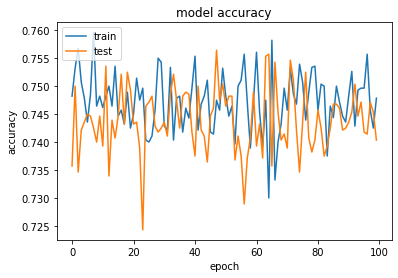

In [103]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()